In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment.

In [2]:
data=pd.read_excel("iris.xls")

In [3]:
#Check for the data summary
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.shape

(150, 5)

# Preprocessing

# a. Check for null values

In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

# b. Handling Missing Values

In [9]:
# since the missing field SL,SW & PL are continous, we will go for median to fill null values

data.loc[data["SL"].isna(),"SL"]=data["SL"].median()
data.loc[data["SW"].isna(),"SW"]=data["SW"].median()
data.loc[data["PL"].isna(),"PL"]=data["PL"].median()

# Check for the null values
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# c.Check for outliers

In [10]:
numerica_data=data.select_dtypes(include='float64')
categorical=data.select_dtypes(include='object')
numerica_data

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


Text(0, 0.5, 'values')

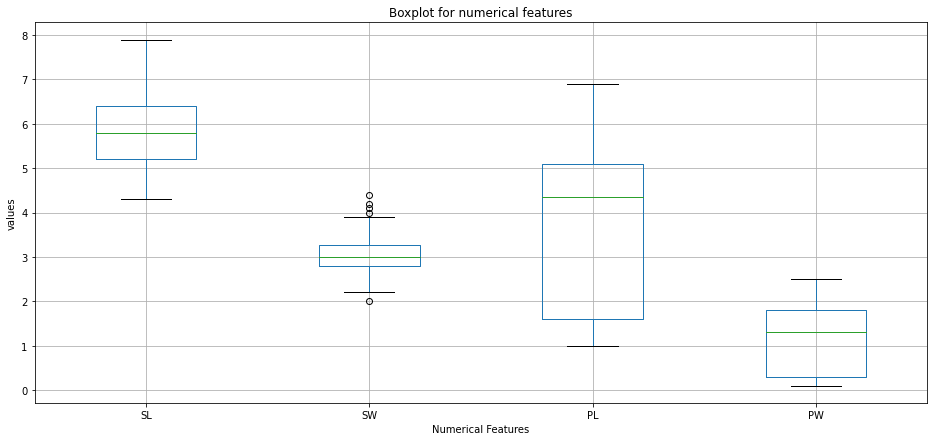

In [11]:
plt.figure(figsize=(16,7))
numerica_data.boxplot()
plt.title("Boxplot for numerical features")
plt.xlabel("Numerical Features")
plt.ylabel("values")

Notes
1. We can see the outliers in SW column
2. so we will handle it using IQR method

# d. Handling of Outliers SW Feature

<AxesSubplot:title={'center':'Boxplot of SW feature'}>

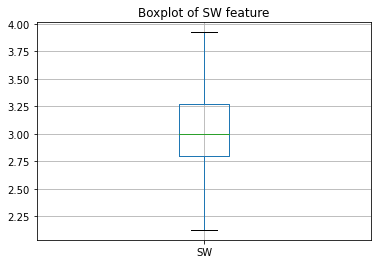

In [13]:
Q1=np.percentile(data["SW"],25,interpolation='midpoint')
Q2=np.percentile(data["SW"],50,interpolation='midpoint')
Q3=np.percentile(data["SW"],75,interpolation='midpoint')
IQR=Q3-Q1
Min_lim=Q1-(1.5*IQR)
Max_lim=Q3+(1.5*IQR)
data.loc[data["SW"]<Min_lim,"SW"]=Min_lim
data.loc[data["SW"]>Max_lim,"SW"]=Max_lim

plt.title("Boxplot of SW feature")
data[["SW"]].boxplot()

Note: outliers replaced by IQR method

# e. Visualise whole data

In [14]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.041500,3.780000,1.198667
std,0.808567,0.402924,1.729424,0.763161
min,4.300000,2.125000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,3.925000,6.900000,2.500000


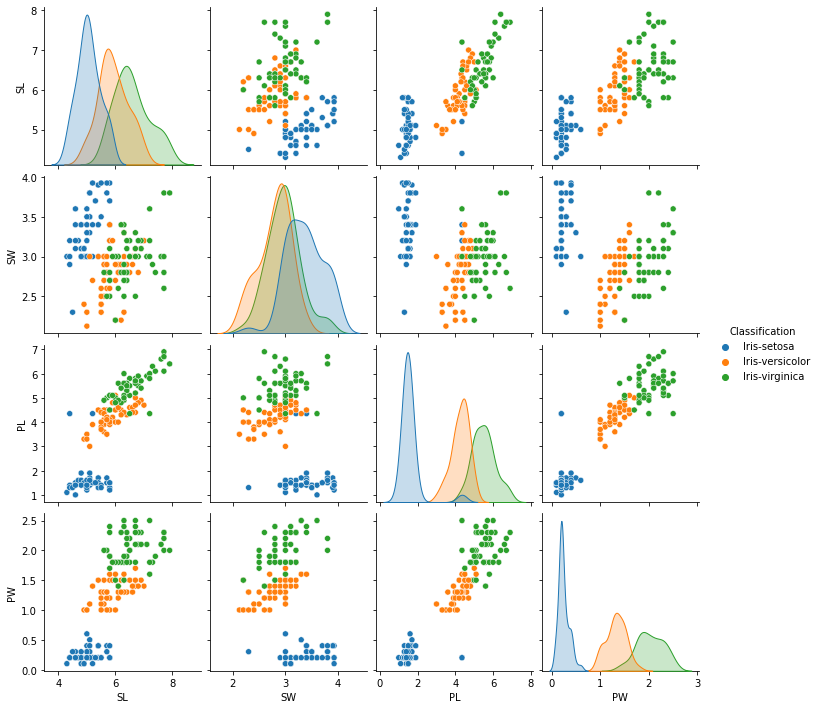

In [15]:
#visualise the whole data
sns.pairplot(data, hue="Classification")

From this visualization, we can tell that iris-setosa is well separated from the other two flowers.

Average of each feature of each class


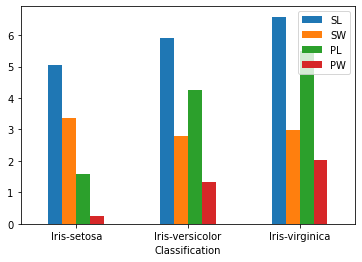

In [16]:
data.columns
print("Average of each feature of each class")
data_group=data.groupby("Classification")[['SL', 'SW', 'PL', 'PW']].mean()
data_group.plot.bar(rot=0)
plt.show()

Note:  verginica is the longest and setosa is the shortest flower.

# f. Label encode the target feature

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
lbl=LabelEncoder()
data["Classification"]=pd.DataFrame(lbl.fit_transform(data["Classification"]))
data["Classification"].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

In [19]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification      int32
dtype: object

In [20]:
##

In [21]:
##

# Feature Engineering

In [22]:
data["SL to SW ratio"]=data["SL"]/data["SW"]
data["PL to PW ratio"]=data["PL"]/data["PW"]
data["SL to PL ratio"]=data["SL"]/data["PL"]
data["SW to PW ratio"]=data["SW"]/data["PW"]

In [23]:
data.head()

,SL,SW,PL,PW,Classification,SL to SW ratio,PL to PW ratio,SL to PL ratio,SW to PW ratio
0,5.1,3.5,1.4,0.2,0,1.457143,7.0,3.642857,17.5
1,4.9,3.0,1.4,0.2,0,1.633333,7.0,3.500000,15.0
2,5.8,3.2,1.3,0.2,0,1.812500,6.5,4.461538,16.0
3,4.6,3.1,1.5,0.2,0,1.483871,7.5,3.066667,15.5
4,5.0,3.6,1.4,0.2,0,1.388889,7.0,3.571429,18.0


# Split the Data into dependent & independent variable

In [47]:
y=data["Classification"]
x=data.drop("Classification", axis=1)
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 150, dtype: int32

# Apply Standard Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [30]:
std=StandardScaler()
x=pd.DataFrame(std.fit_transform(x),columns=x.columns)

In [31]:
x

,SL,SW,PL,PW,SL to SW ratio,PL to PW ratio,SL to PL ratio,SW to PW ratio
0,-0.934811,1.141745,-1.380791,-1.312977,-1.318195,0.738199,1.543937,1.375777
1,-1.182990,-0.103342,-1.380791,-1.312977,-0.857697,0.738199,1.409709,1.059476
2,-0.066181,0.394692,-1.438808,-1.312977,-0.389420,0.586992,2.313165,1.185996
3,-1.555260,0.145675,-1.322775,-1.312977,-1.248337,0.889406,1.002552,1.122736
4,-1.058900,1.390762,-1.380791,-1.312977,-1.496586,0.738199,1.476823,1.439037
...,...,...,...,...,...,...,...,...
145,1.050628,-0.103342,0.823834,1.447956,0.710485,-0.694980,-0.668239,-0.673300
146,0.554268,-1.348429,0.707801,0.922064,1.459728,-0.582872,-0.694982,-0.671852
147,0.802448,-0.103342,0.330694,1.053537,0.536243,-0.720948,-0.474879,-0.648546
148,0.430178,0.892727,0.939866,1.447956,-0.360593,-0.668683,-0.800077,-0.651296


# Split the data into train & test data

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [84]:
x_train.shape

(120, 8)

In [85]:
x_test.shape

(30, 8)

In [86]:
y_train.shape

(120,)

In [87]:
y_test.shape

(30,)

# Build the Different Model

# 1.  Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix

In [117]:
r=[]
rd=RandomForestClassifier()
rd.fit(x_train,y_train)
y_pred=rd.predict(x_test)
f1=f1_score(y_test,y_pred,average='micro')
r.append(f1)
print("f1 score for Random Forest Model:",f1)

f1 score for Random Forest Model: 1.0


In [90]:
confusion_matrix(y_pred, y_test)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# check for the Feature Importance

In [55]:
pd.Series(rd.feature_importances_,index=x.columns).sort_values(ascending=False)*100

PW                24.667560
SW to PW ratio    23.035446
PL                20.616047
SL to PL ratio    12.554085
PL to PW ratio     8.119605
SL to SW ratio     7.226108
SL                 3.354633
SW                 0.426516
dtype: float64

# 2. KNN Model

Text(0, 0.5, 'Accuracy')

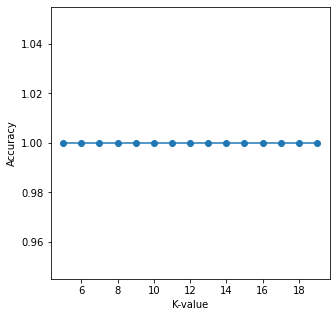

In [105]:
# Find find a best value for K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

lim=np.arange(5,20)
accc=[]

for i in lim:
    knn_obj=KNeighborsClassifier(n_neighbors=i, metric="minkowski")
    knn_obj.fit(x_train,y_train)
    y_pred=rd.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    accc.append(acc)

plt.figure(figsize=(5,5))
plt.plot(lim,accc,'-o')
plt.xlabel("K-value")
plt.ylabel("Accuracy")

note: Accuracy is same for all the K values, sp we can choose any of that range

In [118]:
# Builiding KNN Model with K value=7

knn_obj=KNeighborsClassifier(n_neighbors=7, metric="minkowski")
knn_obj.fit(x_train,y_train)
y_pred=knn_obj.predict(x_test)
f1=f1_score(y_test,y_pred,average='micro')
r.append(f1)
print("f1 score for KNN Model:",f1)

f1 score for KNN Model: 0.9666666666666667


# 3.LOgistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [119]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
f1=f1_score(y_test,y_pred,average='micro')
r.append(f1)
print("f1 score for Logistic Regression Model:",f1)

f1 score for Logistic Regression Model: 0.9666666666666667


C:\Users\raseena.ppallintakat\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 4. SVM Model

In [69]:
from sklearn.svm import SVC

In [120]:
svm_obj=SVC()
svm_obj.fit(x_train,y_train)
y_pred=svm_obj.predict(x_test)
f1=f1_score(y_test,y_pred,average='micro')
r.append(f1)
print("f1 score for SVM Model:",f1)

f1 score for SVM Model: 1.0


# 5. Decision Tree

In [121]:
from sklearn.tree import DecisionTreeClassifier
dct_obj=DecisionTreeClassifier()
dct_obj.fit(x_train,y_train)
y_pred=dct_obj.predict(x_test)
f1=f1_score(y_test,y_pred,average='micro')
r.append(f1)
print("f1 score for SVM Model:",f1)

f1 score for SVM Model: 0.9666666666666667


# 6. Gradient Boosting

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
gb_obj=GradientBoostingClassifier()
gb_obj.fit(x_train,y_train)
y_pred=gb_obj.predict(x_test)
f1=f1_score(y_test,y_pred,average='micro')
r.append(f1)
print("f1 score for SVM Model:",f1)

f1 score for SVM Model: 0.9666666666666667


In [123]:
r=pd.DataFrame(r, index=["Random Forest","KNN","Logistic Regression","SVM","Decision Tree","Gradient Boosting"])
r

,0
Random Forest,1.000000
KNN,0.966667
Logistic Regression,0.966667
SVM,1.000000
Decision Tree,0.966667
Gradient Boosting,0.966667


In [ ]:
Note: 
    
1. F1 score is 1 for Random Forest, SVM & Decision Tree Model
2. so we can go for any of these